In [1]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gather

In [2]:
#Reading CSV file
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#Downloading tsv file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [5]:
#adding tweets to lines of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [378]:
# For loop to append each tweet into a list
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [379]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()
# Add selected variables to tweet_info DataFrame
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

# Asses

In [380]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [381]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [382]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [383]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [384]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [385]:
tweet_info.tail()

,id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [386]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [387]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [388]:
image_predictions.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [389]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [390]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [391]:
image_predictions.describe()

,tweet_id,img_num,first_confidence,second_confidence,third_confidence
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [392]:
twitter_archive.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [393]:
# total missing values for each features
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [394]:
# View lowercase name
twitter_archive.loc[(twitter_archive['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [395]:
twitter_archive.name.str.islower().sum()

109

In [396]:
twitter_archive.name.str.islower()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352     True
2353     True
2354     True
2355    False
Name: name, Length: 2356, dtype: bool

In [397]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [398]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [399]:
# View rows where text column contains #.#/# indicating a decimal for the rating numerator, 
# however they do not appear in the 'rating_numerator' column
twitter_archive[twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Mohamed Asem\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


# Quality issues:

Some columns have huge amount of missing values, for example, "in_reply_to_status_id"

The datatype of "timestamp" is not correct.

The varaible "expanded_urls" also has few missing values, which means some records had no images

The standard for "rating_denominator" is 10, but it includes some other numbers, which could be the misparse.

The "rating_numerator" also has some incorrect values.

Some dog name are incorrect.

extra characters after '&' in twitter_archive_clean['text'].

The columns' names are not clear and straightforward such as p1,p2.


# tidiness issues:
Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one colomn -- stage

tweet_info and image predictions to twitter_archive table.

# Clean

In [400]:
# copies for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_info_clean = tweet_info.copy()

# Define issue #1 (Tidiness)
Combining dog types in one column as one variable and filling the nan values

# Code

In [401]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')

In [402]:
# use cat to combine 
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the four old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

# replacing multistage variables with "multiple"
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('doggopupper', 'doggo,pupper')
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('doggofloofer', 'doggo,floofer')
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('doggopuppo', 'doggo,puppo')

# Test

In [403]:
twitter_archive_clean['stage'].value_counts()

pupper           245
doggo             83
puppo             29
doggo,pupper      12
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

In [404]:
print(twitter_archive_clean.shape)
print(twitter_archive.shape)

(2356, 14)
(2356, 17)


# Define issue 2 (Tidiness)

Add tweet_info table and image_prediction to twitter_archive table.

# Code

In [405]:
# rename the 'id' from `tweet_data` in preparing for table join
tweet_info_clean.rename(columns={'id': 'tweet_id'}, inplace = True)

In [406]:
print(twitter_archive_clean.tweet_id.count())
print(tweet_info_clean.tweet_id.count())

2356
2354


In [407]:
# join two tables on 'tweet_id' and use inner join method
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_info_clean, on='tweet_id', how = 'inner')
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

# Test

In [408]:
twitter_archive_clean.tweet_id.count()

2073

In [409]:
# drop the duplicates due to join
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [410]:
print(twitter_archive_clean.tweet_id.count())
print(tweet_info_clean.tweet_id.count())
print(image_predictions_clean.tweet_id.count())

2073
2354
2075


In [411]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  stage                       320 n

# Define issue 1 (Quality)

Remove all the unnecessary columns directly

# Code

In [412]:
# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]
twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

# Test

In [413]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   stage               306 non-null    object 
 9   retweet_count       1994 non-null   int64  
 10  favorite_count      1994 non-null   int64  
 11  jpg_url             1994 non-null   object 
 12  img_num             1994 non-null   int64  
 13  first_prediction    1994 non-null   object 
 14  first_confidence    1994 non-null   float64
 15  first_dog           1994 non-null   bool   
 16  second

# Define issue 2 (Quality)

Change the datatype of 'timestamp' to datetime

# Code

In [414]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

# Test

In [415]:
twitter_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

# Define issue 3 (Quality)

Remove the records with no images information

# Code

In [416]:
# drop the records without images 
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

# Test

In [417]:
twitter_archive_clean.expanded_urls.isnull().sum()

0

# Define issue 4 (Quality)

10 is the default value of ‘rating_denominator’, then correct the wrong values based on the corresponding text information.

# Code

In [418]:
twitter_archive_clean.rating_denominator.value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

In [419]:
# filter the wrong rating_denominator values

df1 = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
345,820690176645140481,The floofs have been released I repeat the flo...,84,70
415,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
734,758467244762497024,Why does this never happen at my front door......,165,150
876,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
924,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
967,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1001,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1022,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1047,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1065,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [420]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

# Test

In [421]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
876,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,10,None,NaN,9220,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True


# Define issue 5 (Quality)

Correct the 'rating_numerator' values from the text information

# Code

In [422]:
twitter_archive_clean.rating_numerator.value_counts()

12      450
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [423]:
twitter_archive_clean.rating_numerator.astype(float)

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2068     5.0
2069     6.0
2070     9.0
2071     7.0
2072     8.0
Name: rating_numerator, Length: 1994, dtype: float64

In [424]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator']]

C:\Users\Mohamed Asem\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator
40,883482846933004288,This is Bella. She hopes her smile made you sm...,5
558,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75
614,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1451,680494726643068929,Here we have uncovered an entire battalion of ...,26


In [425]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 883482846933004288, ['rating_numerator']] = 13.5
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, ['rating_numerator']] = 9.75
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, ['rating_numerator']] = 11.27
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, ['rating_numerator']] = 11.26


# Test

In [426]:
# filter the wrong rating_numerator values

df1 = twitter_archive_clean[twitter_archive_clean['rating_numerator'] != 13]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12.0,10
4,891327558926688256,This is Franklin. He would like you to stop ca...,12.0,10
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14.0,10
13,889638837579907072,This is Ted. He does his best. Sometimes that'...,12.0,10
16,888917238123831296,This is Jim. He found a fren. Taught him how t...,12.0,10
...,...,...,...,...
2068,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5.0,10
2069,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6.0,10
2070,666033412701032449,Here is a very happy pup. Big fan of well-main...,9.0,10
2071,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7.0,10


# Define issue 6 (Quality)

Change the frequent incorrect dog name to None

# Code

In [427]:
twitter_archive_clean['name'].value_counts().head()
# it shows that  it has lots of missing values in name and "a" is even not a name

None       546
a           55
Charlie     11
Cooper      10
Lucy        10
Name: name, dtype: int64

In [428]:
twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower())]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
21,887517139158093824,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14.0,10,such,NaN,12082,...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
50,881536004380872706,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14.0,10,a,pupper,16570,...,1,Samoyed,0.281463,True,Angora,0.272066,False,Persian_cat,0.114854,False
141,859196978902773760,2017-05-02 00:04:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12.0,10,quite,NaN,25661,...,1,Angora,0.224218,False,malamute,0.216163,True,Persian_cat,0.128383,False
155,855459453768019968,2017-04-21 16:33:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12.0,10,quite,NaN,8987,...,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
293,828650029636317184,2017-02-06 17:02:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14.0,10,one,NaN,1544,...,1,golden_retriever,0.649209,True,Chesapeake_Bay_retriever,0.198560,True,vizsla,0.056200,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2.0,10,an,NaN,879,...,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
2067,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10.0,10,a,NaN,60,...,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
2069,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,NaN,147,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2070,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,NaN,47,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [429]:
#replacing the lowercase names to none
not_name = twitter_archive_clean.loc[(twitter_archive_clean['name'].str.islower())]
not_name_list = not_name['text'].tolist()
for entry in not_name_list:
    mask = twitter_archive_clean.text == entry
    name_column = 'name'
    twitter_archive_clean.loc[mask, name_column] = "None"

# Test

In [430]:
twitter_archive_clean['name'].sort_values()

836      Abby
847      Abby
768       Ace
1656     Acro
1109    Adele
        ...  
96       Zoey
1862     Zoey
8        Zoey
125     Zooey
1602     Zuzu
Name: name, Length: 1994, dtype: object

# Define issue 7 (Quality)

Remove extra characters after '&' in 'text' column.

# Code

In [431]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].str.replace('&amp;', '&')

In [432]:
twitter_archive_clean['text'].str.replace('&amp;', '&')

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2068    Here we have a 1949 1st generation vulpix. Enj...
2069    This is a purebred Piers Morgan. Loves to Netf...
2070    Here is a very happy pup. Big fan of well-main...
2071    This is a western brown Mitsubishi terrier. Up...
2072    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 1994, dtype: object

# Test

In [433]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('&amp;')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog


# Define issue 8  (Quality)

Change the column names for better readability in image_predictions.

# Code

In [434]:
# change the column names
image_predictions.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

# Test

In [435]:
image_predictions.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Store

In [436]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Analyze and Visualize

In [437]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,...,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Retweet Count vs Favorite count

In [438]:
image_predictions['first_prediction'].value_counts().head(20)

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Name: first_prediction, dtype: int64

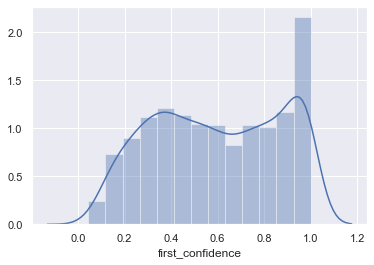

In [439]:
sns.set(style='darkgrid')
ax = sns.distplot(image_predictions['first_confidence'])

The success of the system prediction about being a breed of dog

(-1.1086866580463621,
 1.1197796704326126,
 -1.1183657634231952,
 1.1101005650557796)

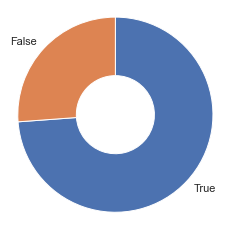

In [440]:
sns.set(style='darkgrid')
sorted_p1 = image_predictions['first_dog'].value_counts()
plt.pie(sorted_p1, labels = sorted_p1.index, startangle = 90, counterclock = False,
       wedgeprops = {'width': 0.6})
plt.axis('square')

The pie chart indicates almost 2/3 situations the predictions are correct

Text(0.5, 1.0, 'The Distribution of Dog Stages')

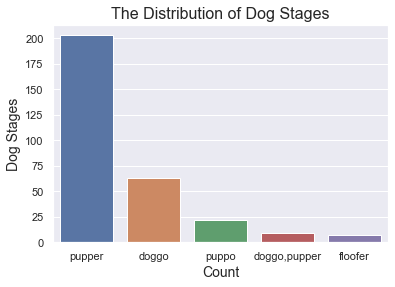

In [441]:

sorted_stage = twitter_archive_clean['stage'].value_counts().head().index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

The distribution of dogs

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

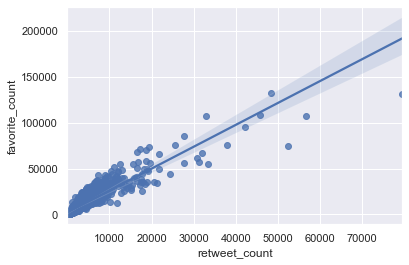

In [442]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean)

relationship between retweet_count and favorite_count